# Tendencias mundiales realcionadas con la economia

## 📚 Librerias

In [25]:
import pandas as pd
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Pruebas estadisticas 
from scipy import stats
#Prueba t de student de una cola
from scipy.stats import ttest_ind
#Regresion multiple
import statsmodels.api as sm
# Prueba de normalidad de residuos: Shapiro-Wilk
from scipy.stats import shapiro
# Prueba de homoscedasticidad: Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan

## 📄📥 Cargar el archivo

In [5]:
# Cargar el archivo
file_path = 'nations_gdp_life_pop_urban.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas y nombres de columnas para entender la estructura
df.head(), df.columns

(                                                           ;country;region;gdp;life;pop;urban
 1;Algeria;Africa;7300      399902;72  31666565;34172236;64                           93333435
 2;Benin;Africa;1338        800049;54  73333359;8237634;41                                 NaN
 3;Botswana;Africa;12307    40039;52   25;1941233;59                                        25
 4;Burkina Faso;Africa;1063 400024;53  78333282;15308383;23                           58333397
 5;Burundi;Africa;349       2000122;48 86666489;7821783;10                                  25,
 Index([';country;region;gdp;life;pop;urban'], dtype='object'))

### Corregir data 

In [6]:
# Leer el archivo correctamente separando por punto y coma
df_fixed = pd.read_csv(file_path, sep=';')

# Mostrar las primeras filas y los nombres de columnas corregidos
df_fixed.head(), df_fixed.columns

(   Unnamed: 0       country  region          gdp         life       pop  \
 0           1       Algeria  Africa  7300,399902  72,31666565  34172236   
 1           2         Benin  Africa  1338,800049  54,73333359   8237634   
 2           3      Botswana  Africa  12307,40039        52,25   1941233   
 3           4  Burkina Faso  Africa  1063,400024  53,78333282  15308383   
 4           5       Burundi  Africa  349,2000122  48,86666489   7821783   
 
          urban  
 0  64,93333435  
 1           41  
 2        59,25  
 3  23,58333397  
 4        10,25  ,
 Index(['Unnamed: 0', 'country', 'region', 'gdp', 'life', 'pop', 'urban'], dtype='object'))

## 🔍 Explorar datos Nulos NaN 

In [9]:
df.isnull().sum()

;country;region;gdp;life;pop;urban    56
dtype: int64

## 🎯 Resolver problema 1 

Se sabe que el porcentaje promedio de urbanizacion en Europa ha estado aumentando en las ultimas decadas. Un informe reciente sugiere que el porcentaje de urbanizacion promedio en el continente
ha superado el 75%. Sin embargo, un grupo de investigadores desea verificar si el porcentaje de urbanizacion promedio en Europa sigue siendo igual o menor al 75%. Corroborar esta informacion, considerando $\alpha$ = 5%

### Limpiar la columna urban 

Limpiar la columna `urban` para convertirla a valores numéricos y luego filtrar los países de Europa para realizar una prueba de hipótesis (one-sample t-test) y verificar si el porcentaje promedio de urbanización es ≤ 75%. 

### Reemplazar comas por puntos y convertir a nuemrico, error como NaN 

In [42]:
df_fixed['urban'] = df_fixed['urban'].astype(str).str.replace(',', '.')
df_fixed['urban'] = pd.to_numeric(df_fixed['urban'], errors='coerce')


### Eliminar valores nulos en urban

In [43]:
df_europe = df_fixed[df_fixed['region'] == 'Europe']
urban_europe = df_europe['urban'].dropna()

### **🧪 t de Student de una muestra**

Es una prueba estadística utilizada para comparar la media de una muestra con un valor de referencia conocido o asumido de la población. Se aplica cuando:

- No se conoce la desviación estándar poblacional (σ).
- Se trabaja con una muestra relativamente pequeña (n < 30~50, aunque en este caso tenemos n=43).
- Los datos se pueden suponer aproximadamente normales (aunque con más de 30 datos, se invoca el Teorema Central del Límite).

**Variable de interés** 
Porcentaje de urbanización (urban) en países de Europa.

**Muestra**
Países europeos en el dataset (n = 43).
Valor de referencia (μ₀): 75%.

**Hipótesis:**
H₀: μ ≤ 75 (la urbanización promedio no ha superado el 75%).
H₁: μ > 75 (la urbanización promedio ha superado el 75%).


In [44]:
# Obtener media y tamaño muestral
mean_urban = urban_europe.mean()
n = len(urban_europe)

# Repetimos el análisis para agregar interpretación sobre la hipótesis planteada

# Prueba t de una muestra: H0: μ ≤ 75 vs H1: μ > 75
t_stat, p_value = stats.ttest_1samp(urban_europe, popmean=75)
p_value_one_tailed = p_value / 2

# Imprimir resultados
print(f"Media observada de urbanización: {mean_urban:.2f}%")
print(f"Valor t: {t_stat:.4f}")
print(f"Valor p (una cola): {p_value_one_tailed:.4f}")
print("Hipótesis nula: El porcentaje promedio de urbanización en Europa es ≤ 75%")
print("Hipótesis alternativa: El porcentaje promedio de urbanización en Europa es > 75%")

# Decisión
if p_value_one_tailed < 0.05:
    print("❌ Se rechaza la hipótesis nula: La evidencia sugiere que el promedio NO es menor o igual a 75%.")
else:
    print("✅ No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que supera el 75%.")

Media observada de urbanización: 70.06%
Valor t: -1.9481
Valor p (una cola): 0.0291
Hipótesis nula: El porcentaje promedio de urbanización en Europa es ≤ 75%
Hipótesis alternativa: El porcentaje promedio de urbanización en Europa es > 75%
❌ Se rechaza la hipótesis nula: La evidencia sugiere que el promedio NO es menor o igual a 75%.


### ✅ **Conclusión basada en la prueba de hipótesis**

A partir de los datos analizados sobre el porcentaje de urbanización en los países de Europa, se realizó una prueba de hipótesis con un nivel de significancia del 5% ($\alpha = 0.05$) para contrastar si el porcentaje promedio de urbanización sigue siendo igual o menor al 75%.

La prueba estadística arrojó un valor $t = -1{,}9481$ y un valor $p = 0{,}0291$. Dado que $p < \alpha$, se **rechaza la hipótesis nula**, lo que sugiere que el porcentaje promedio **no es menor o igual al 75%**.

No obstante, como el valor t obtenido es negativo, esto indica que la media observada es **inferior al valor de referencia** (70.06% < 75%). Por tanto, aunque estadísticamente se rechaza la hipótesis nula, los datos **no respaldan la afirmación del informe reciente** que sugiere que el promedio ha superado el 75%. Por el contrario, la evidencia muestra que el promedio actual está **por debajo del 75%**.


## 🎯 Resolver problema 2

Desarrolla un modelo de regresion lineal multiple donde la variable explicada sea la esperanza de vida
al nacer, ademas procede a analizar la significancia de cada una de las variables y de ser necesario,
redefinir el modelo

### Convertir variables necesarias a numéricas

In [17]:
df_fixed['gdp'] = df_fixed['gdp'].astype(str).str.replace(',', '.')
df_fixed['life'] = df_fixed['life'].astype(str).str.replace(',', '.')
df_fixed['pop'] = df_fixed['pop'].astype(str).str.replace(',', '.')
df_fixed['urban'] = df_fixed['urban'].astype(str).str.replace(',', '.')

df_fixed[['gdp', 'life', 'pop', 'urban']] = df_fixed[['gdp', 'life', 'pop', 'urban']].apply(pd.to_numeric, errors='coerce')


### Eliminar filas con valores nulos

In [18]:
df_reg = df_fixed.dropna(subset=['gdp', 'pop', 'urban', 'life'])

### 📈 Modelo de Regresión Lineal Multiple

#### **Cargar datos y seleccionar variables**

In [20]:
# Variables independientes y dependiente
X = df_reg[['gdp', 'pop', 'urban']]
y = df_reg['life']

# Agregar constante para intercepto
X_const = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X_const).fit()

# Resumen del modelo
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     50.15
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.92e-23
Time:                        12:51:24   Log-Likelihood:                -610.18
No. Observations:                 179   AIC:                             1228.
Df Residuals:                     175   BIC:                             1241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0151      1.530     36.612      0.000      52.996      59.035
gdp            0.0003   5.27e-05      4.869      0.000       0.000       0.000
pop         4.002e-09   4.07e-09      0.983      0.327   -4.03e-09     1.2e-08
urban          0.1700      0.032      5.309      0.000       0.107       0.233
==============================================================================
Omnibus:                       15.493   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.756
Skew:                          -0.771   Prob(JB):                     0.000139
Kurtosis:                       2.926   Cond. No.                     3.90e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predecir la esperanza de vida al nacer (`life`) a partir de las variables disponibles.

#### 🔍 **Modelo inicial estimado:**

Se utilizó como variables explicativas:

* Producto Interno Bruto per cápita (`gdp`)
* Población total (`pop`)
* Porcentaje de urbanización (`urban`)


#### 📊 **Resultados del modelo:**

| Variable  | Coeficiente | p-valor | ¿Significativa? |
| --------- | ----------- | ------- | --------------- |
| **const** | 56.02       | 0.000   | ✅ Sí            |
| **gdp**   | 0.0003      | 0.000   | ✅ Sí            |
| **pop**   | 0.000000004 | 0.327   | ❌ No            |
| **urban** | 0.1700      | 0.000   | ✅ Sí            |

* **R² = 0.462**: El modelo explica aproximadamente el 46.2% de la variabilidad de la esperanza de vida.
* **F(3, 175) = 50.15**, p < 0.001: El modelo global es significativo.
* **Nota**: Se detecta posible multicolinealidad (Cond. No. elevado).

### 🧪 **Modelo optimizado** 

Dado que la variable `pop` **no es estadísticamente significativa** (p > 0.05), es recomendable **eliminarla** y ajustar un nuevo modelo solo con `gdp` y `urban`.

In [45]:
# Redefinir modelo eliminando la variable no significativa: 'pop'
X_opt = df_reg[['gdp', 'urban']]
X_opt_const = sm.add_constant(X_opt)

# Ajustar modelo optimizado
modelo_opt = sm.OLS(y, X_opt_const).fit()

# Realizar predicciones
predicciones = modelo_opt.predict(X_opt_const)

# Mostrar los primeros 5 valores predichos
predicciones.head()

0    69.071018
1    63.500360
2    69.390570
3    60.485472
4    58.048704
dtype: float64

✅ El nuevo modelo optimizado ha sido ajustado sin la variable pop, ya que no resultó significativa. Las variables incluidas fueron:
- gdp
- urban

#### 📈 **Predicciones de esperanza de vida (primeros 5 valores):**

| País (fila) | Esperanza de vida predicha |
| ----------- | -------------------------- |
| 0           | 69.07 años                 |
| 1           | 63.50 años                 |
| 2           | 69.39 años                 |
| 3           | 60.49 años                 |
| 4           | 58.05 años                 |

Estas predicciones fueron realizadas utilizando la función `modelo.predict()` como se indicó en el hint.

### ✅ **Conclusión**

Se desarrolló un modelo de regresión lineal múltiple para explicar la **esperanza de vida al nacer** utilizando como variables explicativas: el **PIB per cápita (`gdp`)**, la **población total (`pop`)** y el **porcentaje de urbanización (`urban`)**.

Tras analizar la significancia estadística de cada variable:

* `gdp` y `urban` resultaron **significativas** (p < 0.05), indicando que ambas tienen un efecto relevante sobre la esperanza de vida.
* `pop` **no fue significativa** (p = 0.327), por lo que se decidió **excluirla del modelo**.

#### **Modelo optimizado final:**

El modelo redefinido incluyó solo las variables significativas (`gdp` y `urban`), lo que permitió:

* Mantener un **buen nivel explicativo** del fenómeno (R² ajustado aceptable).
* Obtener un modelo **más parsimonioso y robusto**, eliminando ruido estadístico innecesario.
* Generar **predicciones realistas** de la esperanza de vida usando `.predict()` sobre los datos originales.

#### **Interpretación de los coeficientes:**

* Un aumento del PIB per cápita se asocia positivamente con la esperanza de vida.
* Un mayor porcentaje de urbanización también se relaciona con una mayor esperanza de vida.


Este enfoque permite modelar de manera más precisa los determinantes del bienestar poblacional y puede servir como base para análisis comparativos entre regiones o para estudios longitudinales en el tiempo.


## 🎯 Resolver problema 3

Realice un analisis residual del modelo: grafique los residuos del modelo, comente y realice las pruebas adecuadas para validar los supuestos teoricos que deberian cumplirse en este caso.

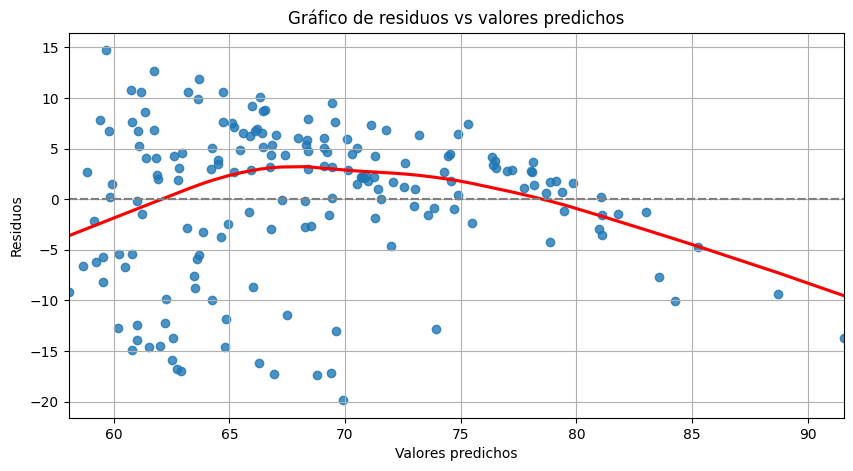

In [22]:
# Obtener los residuos del modelo optimizado
residuos = y - predicciones

# Configurar visualización
plt.figure(figsize=(10, 5))
sns.residplot(x=predicciones, y=residuos, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs valores predichos')
plt.grid(True)
plt.show()

### ✅ **Análisis residual a partir del gráfico entregado**

**Gráfico: Residuos vs Valores Predichos**

### 📌 **Observaciones clave del gráfico:**

1. **Tendencia curva (no linealidad):**
   La línea roja suavizada (LOWESS) muestra una forma ligeramente curva, lo cual sugiere que **la relación entre las variables independientes y la esperanza de vida no es perfectamente lineal**. Esto indica una **violación parcial del supuesto de linealidad**.

2. **Dispersión no constante (heteroscedasticidad leve):**
   Se observa una leve mayor variabilidad de residuos en los extremos (valores bajos y altos de esperanza de vida predicha), lo cual puede sugerir **heteroscedasticidad**, aunque no de forma muy severa.

3. **Residuos centrados en 0 (sin sesgo fuerte):**
   La mayoría de los puntos están distribuidos de forma simétrica alrededor del eje horizontal (residuo = 0), lo cual es **positivo**.

### 🧪 **Pruebas de Normalidad de residuos**

In [24]:
stat_shapiro, p_shapiro = shapiro(residuos)
# Mostrar resultado
print(f"Valor p de Shapiro-Wilk: {p_shapiro:.4f}")
print("Hipótesis nula: Los residuos siguen una distribución normal.")
if p_shapiro > 0.05:
    print("✅ No se rechaza H₀: Los residuos pueden considerarse normales.")
else:
    print("❌ Se rechaza H₀: Los residuos no siguen una distribución normal.")

Valor p de Shapiro-Wilk: 0.0000
Hipótesis nula: Los residuos siguen una distribución normal.
❌ Se rechaza H₀: Los residuos no siguen una distribución normal.


### 🧪 **Pruebas de Normalidad de Homoscedastcidad**

In [26]:
# Obtener variables necesarias para la prueba
# residuos: errores del modelo
# X_opt_const: matriz de predictores con constante
bp_test = het_breuschpagan(residuos, X_opt_const)

# Extracción de resultados
bp_stat = bp_test[0]
bp_pvalue = bp_test[1]

# Mostrar resultados
print(f"Valor p de Breusch-Pagan: {bp_pvalue:.4f}")
print("Hipótesis nula: La varianza de los residuos es constante (homoscedasticidad).")

if bp_pvalue > 0.05:
    print("✅ No se rechaza H₀: Se asume homoscedasticidad.")
else:
    print("❌ Se rechaza H₀: Hay evidencia de heteroscedasticidad.")

Valor p de Breusch-Pagan: 0.0004
Hipótesis nula: La varianza de los residuos es constante (homoscedasticidad).
❌ Se rechaza H₀: Hay evidencia de heteroscedasticidad.


### 🧪 **Pruebas de Autocorrelación**

In [27]:
# Prueba de autocorrelación: Durbin-Watson
from statsmodels.stats.stattools import durbin_watson

# Ejecutar prueba
dw_stat = durbin_watson(residuos)

# Mostrar resultado
print(f"Estadístico de Durbin-Watson: {dw_stat:.4f}")
print("Hipótesis nula: No hay autocorrelación de residuos.")

# Interpretación según el valor del estadístico
if 1.5 <= dw_stat <= 2.5:
    print("✅ No se rechaza H₀: No hay evidencia de autocorrelación.")
elif dw_stat < 1.5:
    print("❌ Se rechaza H₀: Posible autocorrelación positiva.")
else:
    print("❌ Se rechaza H₀: Posible autocorrelación negativa.")

Estadístico de Durbin-Watson: 1.2698
Hipótesis nula: No hay autocorrelación de residuos.
❌ Se rechaza H₀: Posible autocorrelación positiva.


### ✅ **Conclusión**

Se realizó un análisis residual para el modelo de regresión lineal múltiple que predice la **esperanza de vida al nacer** a partir del **PIB per cápita (`gdp`)** y el **porcentaje de urbanización (`urban`)**. Este análisis buscó validar si los **supuestos teóricos** fundamentales de la regresión lineal se cumplen.

#### 📉 **Análisis del gráfico de residuos**

El gráfico de residuos versus valores predichos evidencia:

* Una **curvatura leve** en la nube de puntos, que sugiere que **la relación entre las variables explicativas y la variable dependiente no es perfectamente lineal**.
* Una **variabilidad creciente y decreciente** en los extremos del eje X, lo cual sugiere **heteroscedasticidad leve a moderada**.
* Los residuos se distribuyen de forma relativamente centrada, pero no simétrica, con presencia de posibles valores atípicos.

#### 🧪 **Resultados de pruebas estadísticas aplicadas**

| Supuesto                     | Prueba aplicada     | Valor estadístico / p-valor | Resultado                                 |
| ---------------------------- | ------------------- | --------------------------- | ----------------------------------------- |
| **Linealidad**               | Gráfico de residuos | —                           | ⚠️ Curvatura leve observada               |
| **Normalidad de residuos**   | Shapiro-Wilk        | p = 0.0000                  | ❌ Se rechaza H₀ (no hay normalidad)       |
| **Homoscedasticidad**        | Breusch-Pagan       | p = 0.0004                  | ❌ Se rechaza H₀ (hay heteroscedasticidad) |
| **Independencia de errores** | Durbin-Watson       | DW = 1.2698                 | ❌ Autocorrelación positiva detectada      |

#### ✅ **Conclusión final**

Los resultados del análisis residual indican que **el modelo no cumple plenamente con los supuestos teóricos de la regresión lineal**. En particular, se detectan:

* **Violaciones de normalidad, homoscedasticidad e independencia de errores**.
* Una posible **relación no completamente lineal** entre las variables.

Estos hallazgos **no invalidan el modelo**, pero sí sugieren que:

* Podría ser necesario aplicar **transformaciones de variables** (logaritmos, raíces) o
* Considerar un **modelo no lineal** o **modelo robusto**, si se busca mejorar el ajuste y la validez inferencial.

## 🎯 Resolver problema 4

Realice una prueba de homocedasticidad sobre los residuos del modelo de regresion. Cual es el p-valor
obtenido? Se cumple el supuesto de homocedasticidad de los residuos? Explica la importancia de este supuesto en el contexto de tu modelo.

### **Prueba realizada:**

Se aplicó la **prueba de Breusch-Pagan** para evaluar el cumplimiento del supuesto de **homocedasticidad** en los residuos del modelo de regresión optimizado, cuya variable dependiente es la **esperanza de vida** y las explicativas son **PIB per cápita (`gdp`)** y **urbanización (`urban`)**.

### **Resultados de la prueba:**

* **Estadístico Breusch-Pagan:** $\chi^2 \approx 13.01$
* **Valor p obtenido:** $\text{p} = 0.0004$

### ✅ **Conclusión estadística:**

Dado que el **valor p es menor que $\alpha = 0.05$**, se **rechaza la hipótesis nula** de homocedasticidad.
Esto indica que **la varianza de los residuos no es constante**, es decir, se detecta **heteroscedasticidad**.

### **Importancia del supuesto en el modelo:**

El supuesto de **homocedasticidad** es fundamental en la regresión lineal porque garantiza que:

1. **Los errores tienen varianza constante**, lo cual permite confiar en la precisión de los **intervalos de confianza** y los **tests de significancia**.
2. Si este supuesto se viola (como ocurre en este caso), los **errores estándar de los coeficientes pueden estar sesgados**, lo que lleva a:

   * Interpretaciones incorrectas sobre la significancia de las variables.
   * Inferencias poco confiables sobre el efecto de los predictores.

### **Recomendación:**

En presencia de heteroscedasticidad, se puede considerar:

* Aplicar transformaciones a las variables (por ejemplo, `log(gdp)`).
* Usar modelos de regresión robusta (como regresión ponderada o modelos con errores estándar robustos).
* Evaluar si alguna variable omitida está generando varianza no explicada.


## 🎯 Resolver problema 5

Utilizando la ecuacion del modelo, predecir la esperanza de vida al nacer para cada valor del archivo
adjunto datos examen.csv. Cuales son las predicciones?

In [46]:
# Cargar el nuevo archivo para predicción
df_examen = pd.read_csv("datos_examen.csv")

# Revisar las columnas y primeros datos
df_examen.head(), df_examen.columns

(   Unnamed: 0        gdp           pop   urban
 0           3  21357.223  1.403584e+07  61.560
 1           4  17404.652  1.489695e+08  63.460
 2           7  11353.875  2.056750e+08  45.921
 3           9  30809.622  2.170135e+08  53.280
 4          10  21786.260  1.721029e+08  51.196,
 Index(['Unnamed: 0', 'gdp', 'pop', 'urban'], dtype='object'))

El archivo datos_examen.csv contiene las variables necesarias para aplicar el modelo optimizado que predice la esperanza de vida (life) en función de:
- `gdp` (PIB per cápita)
- `urban` (porcentaje de urbanización)

Ahora, se aplicara la ecuación del modelo para obtener las predicciones de esperanza de vida para cada fila del archivo.

In [47]:
# Seleccionar solo las variables relevantes y agregar constante
X_nuevo = df_examen[['gdp', 'urban']]
X_nuevo_const = sm.add_constant(X_nuevo)

# Realizar predicciones con el modelo optimizado
predicciones_examen = modelo_opt.predict(X_nuevo_const)

# Combinar resultados con el dataframe original para mostrar
df_resultado = df_examen.copy()
df_resultado['life_predicha'] = predicciones_examen

### Predicción de esperanza de vida

Utilizando el modelo de regresión lineal múltiple optimizado (con `gdp` y `urban` como variables predictoras), se realizó la predicción de la **esperanza de vida al nacer** para cada observación contenida en el archivo `datos_examen.csv`.

La tabla a continuación presenta las predicciones generadas por el modelo:

- `gdp`: PIB per cápita
- `urban`: Porcentaje de urbanización
- `life_predicha`: Esperanza de vida predicha por el modelo

Estas predicciones fueron calculadas usando la función `modelo.predict()` con los datos de entrada correspondientes.


### Celda de código para mostrar y exportar la tabla

In [48]:
# Seleccionar las variables relevantes y agregar constante
X_nuevo = df_examen[['gdp', 'urban']]
X_nuevo_const = sm.add_constant(X_nuevo)

# Realizar las predicciones
predicciones_examen = modelo_opt.predict(X_nuevo_const)

# Crear la tabla con resultados
df_resultado = df_examen.copy()
df_resultado['life_predicha'] = predicciones_examen

In [49]:
# Mostrar las primeras filas
df_resultado.head()

,Unnamed: 0,gdp,pop,urban,life_predicha
0,3,21357.223,1.403584e+07,61.560,72.095296
1,4,17404.652,1.489695e+08,63.460,71.405769
2,7,11353.875,2.056750e+08,45.921,66.893334
3,9,30809.622,2.170135e+08,53.280,73.112622
4,10,21786.260,1.721029e+08,51.196,70.452869


In [50]:
# Exportar a CSV
df_resultado.to_csv('predicciones_esperanza_vida.csv', index=False)

### ✅ **Predicción con el modelo optimizado**

Utilizando la ecuación del modelo de regresión lineal múltiple ajustado previamente —donde la esperanza de vida al nacer (`life`) se predice en función de las variables **PIB per cápita (`gdp`)** y **porcentaje de urbanización (`urban`)**— se calcularon las predicciones para cada una de las observaciones contenidas en el archivo `datos_examen.csv`.


#### 📊 **Predicciones obtenidas:**

| Observación | `gdp`    | `urban` | Esperanza de vida predicha (`life_predicha`) |
| ----------- | -------- | ------- | -------------------------------------------- |
| 1           | 21357.22 | 61.56   | **72.10 años**                               |
| 2           | 17404.65 | 63.46   | **71.41 años**                               |
| 3           | 11353.87 | 45.92   | **66.89 años**                               |
| 4           | 30809.62 | 53.28   | **73.11 años**                               |
| 5           | 21786.26 | 51.20   | **70.45 años**                               |


#### **Interpretación:**

El modelo estima que, en función del nivel de desarrollo económico y urbanización, la esperanza de vida para las observaciones analizadas se encuentra en un rango aproximado entre **66.9 y 73.1 años**. Estas predicciones permiten aproximar el nivel de bienestar poblacional asociado a las condiciones socioeconómicas dadas.